# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

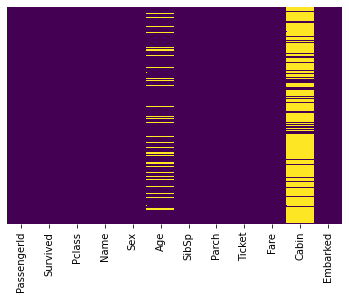

In [9]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis") # visualize empty values

In [23]:
sns.set_style('whitegrid') # setting seaborn style

<AxesSubplot:xlabel='Survived', ylabel='count'>

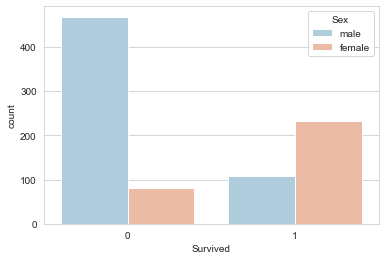

In [22]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r') # see who survived and who didn't based on sex

<AxesSubplot:xlabel='Survived', ylabel='count'>

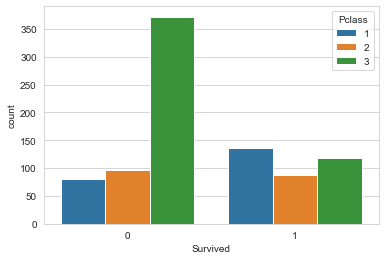

In [17]:
sns.countplot(x='Survived', data=train, hue='Pclass') # see who survived and who didn't based on class

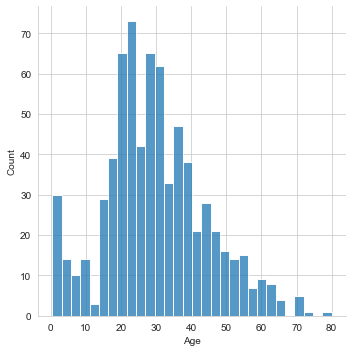

In [20]:
sns.displot(train['Age'].dropna(), kde=False, bins=30) # check age distribution

<AxesSubplot:ylabel='Frequency'>

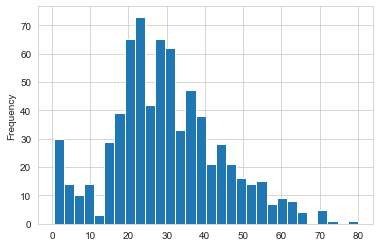

In [21]:
train['Age'].plot.hist(bins=30) # another way of checking age distribution

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

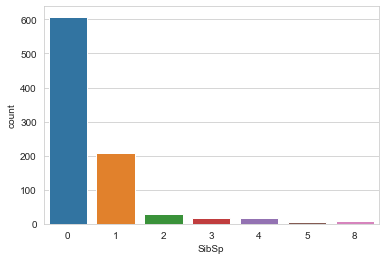

In [26]:
sns.countplot(x='SibSp', data=train) # checking the number of siblings or spouse trends

<AxesSubplot:>

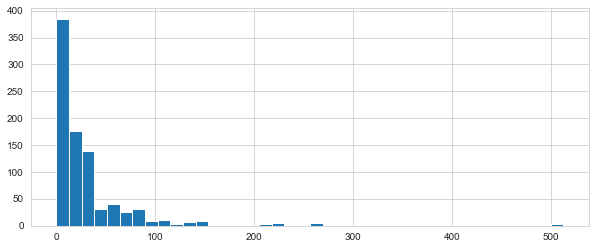

In [29]:
train['Fare'].hist(bins=40, figsize=(10, 4)) # distribution of the fare across passengers

In [31]:
import cufflinks as cf
cf.go_offline()

In [34]:
train['Fare'].iplot(kind='hist', bins=50) # exploring fare distribution with cufflinks

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

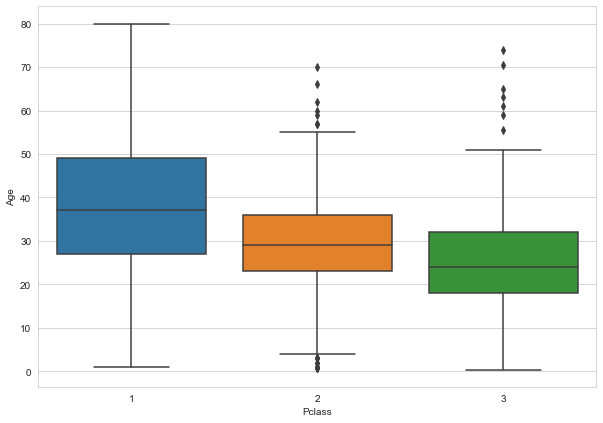

In [36]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [39]:
def impute_age(cols):
    age = cols[0] # first col is Age
    pclass = cols[1] # second col is Pclass
    if pd.isnull(age):
        if pclass == 1:
            return 37 # average age in class 1
        elif pclass == 2:
            return 29 # average age in class 2
        else:
            return 24 # average age in class 3
    else:
        return age

In [40]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

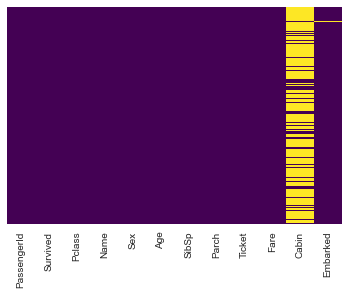

In [42]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [43]:
## too many missing points in the `Cabin` column so we'll drop it
train.drop('Cabin', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

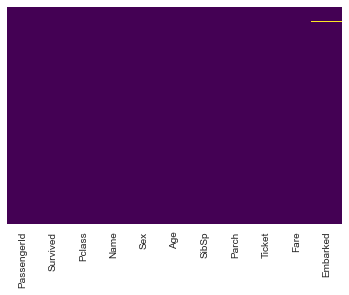

In [44]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [45]:
train.dropna(inplace=True) # to drop the last missing values (not too many)

<AxesSubplot:>

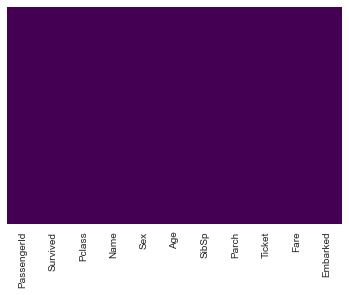

In [47]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis') # we can see no missing values now

In [50]:
sex = pd.get_dummies(train['Sex'], drop_first=True) # drop_first to avoid having both male and female columns which are perfectly correlated

In [51]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [52]:
train = pd.concat([train,sex,embark], axis=1)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [54]:
# dropping columns we're not gonna use
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], inplace=True, axis=1)

In [56]:
train.drop('PassengerId', axis=1, inplace=True) # removing passengerId since it's not useful

In [57]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [58]:
# we are not going to use the train_test_split method on the train df instead of using our test csv file
# we could use the test file and do the whole cleaning process on it again though

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
model = LogisticRegression()

In [64]:
model.fit(X_train, y_train)

/Users/luciengeorge/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [65]:
predictions = model.predict(X_test)

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]])